## Approach
- Understanding Data with descriptive statistics
- Understanding Data with visulization
- Prepare Data for machine learning
- Feature selection for machine learning

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')
data = data.sample(frac = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


### Age wise heart diseases

In [3]:
heart_attacks = data[data['target'] == 1]
heart_attacks.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1


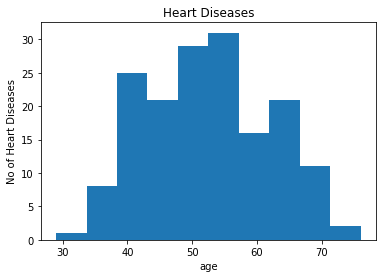

In [4]:
plt.hist(heart_attacks['age'])
plt.xlabel('age')
plt.ylabel('No of Heart Diseases')
plt.title('Heart Diseases')
plt.show()

we can conclude from the above data the age between 40 and 65 heart attacks rate was high

### Gender wise heart diseases

In [5]:
# Gender wise heart diseases
gender_vs_heartattacks = heart_attacks[['sex','target']].groupby(['sex']).count()
gender_vs_heartattacks = gender_vs_heartattacks.reset_index()
gender_vs_heartattacks

,sex,target
0,0,72
1,1,93


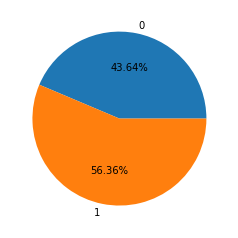

In [6]:
plt.pie(gender_vs_heartattacks['target'],labels = gender_vs_heartattacks['sex'], autopct = '%.2f%%')
plt.show()

### Constrictive pericarditis (CP) VS Heart Attacks 

In [7]:
heart_attacks['cp'].unique()

array([2, 0, 1, 3], dtype=int64)

### Blood Pressure VS Heart attacks

In [8]:
bp_vs_heartattacks = data[data['target'] == 1][['trestbps','target']]
bp_vs_heartattacks.head()

,trestbps,target
136,120,1
46,140,1
44,140,1
126,112,1
118,105,1


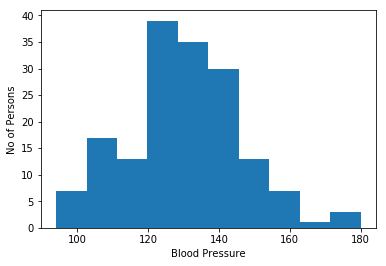

In [9]:
plt.hist(bp_vs_heartattacks['trestbps'])
plt.xlabel('Blood Pressure')
plt.ylabel('No of Persons')
plt.show()

from the above graph it is observed that if blood pressure ranges from 120 to 140 there is high chance of heart attacks.

### Cholestral VS No of Heart Diseases

In [10]:
chol_vs_heartattacks = data[data['target'] == 1][['chol','target']]
chol_vs_heartattacks.head()

,chol,target
136,178,1
46,235,1
44,321,1
126,204,1
118,204,1


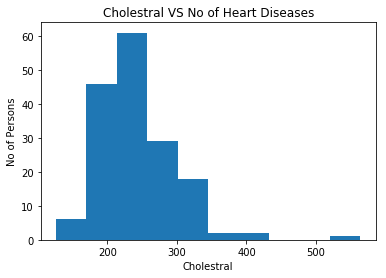

In [11]:
plt.hist(chol_vs_heartattacks['chol'])
plt.xlabel('Cholestral')
plt.ylabel('No of Persons')
plt.title('Cholestral VS No of Heart Diseases')
plt.show()

it is observed that if cholestral levels are approx 250 there is high chances of heart diseases.

### Male BP Vs No of heart attacks

In [12]:
male_bp_vs_heartattacks = data[(data['target'] == 1) & (data['sex'] == 1)]
male_bp_vs_heartattacks.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1


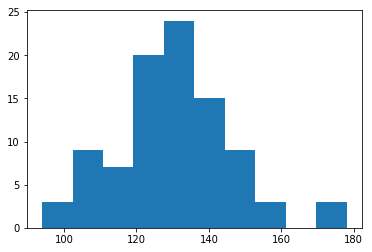

In [13]:
plt.hist(male_bp_vs_heartattacks['trestbps'])
plt.show()

for males if bp ranges from 120 to 140 high chances of heart attacks

### Multivariate Analysis

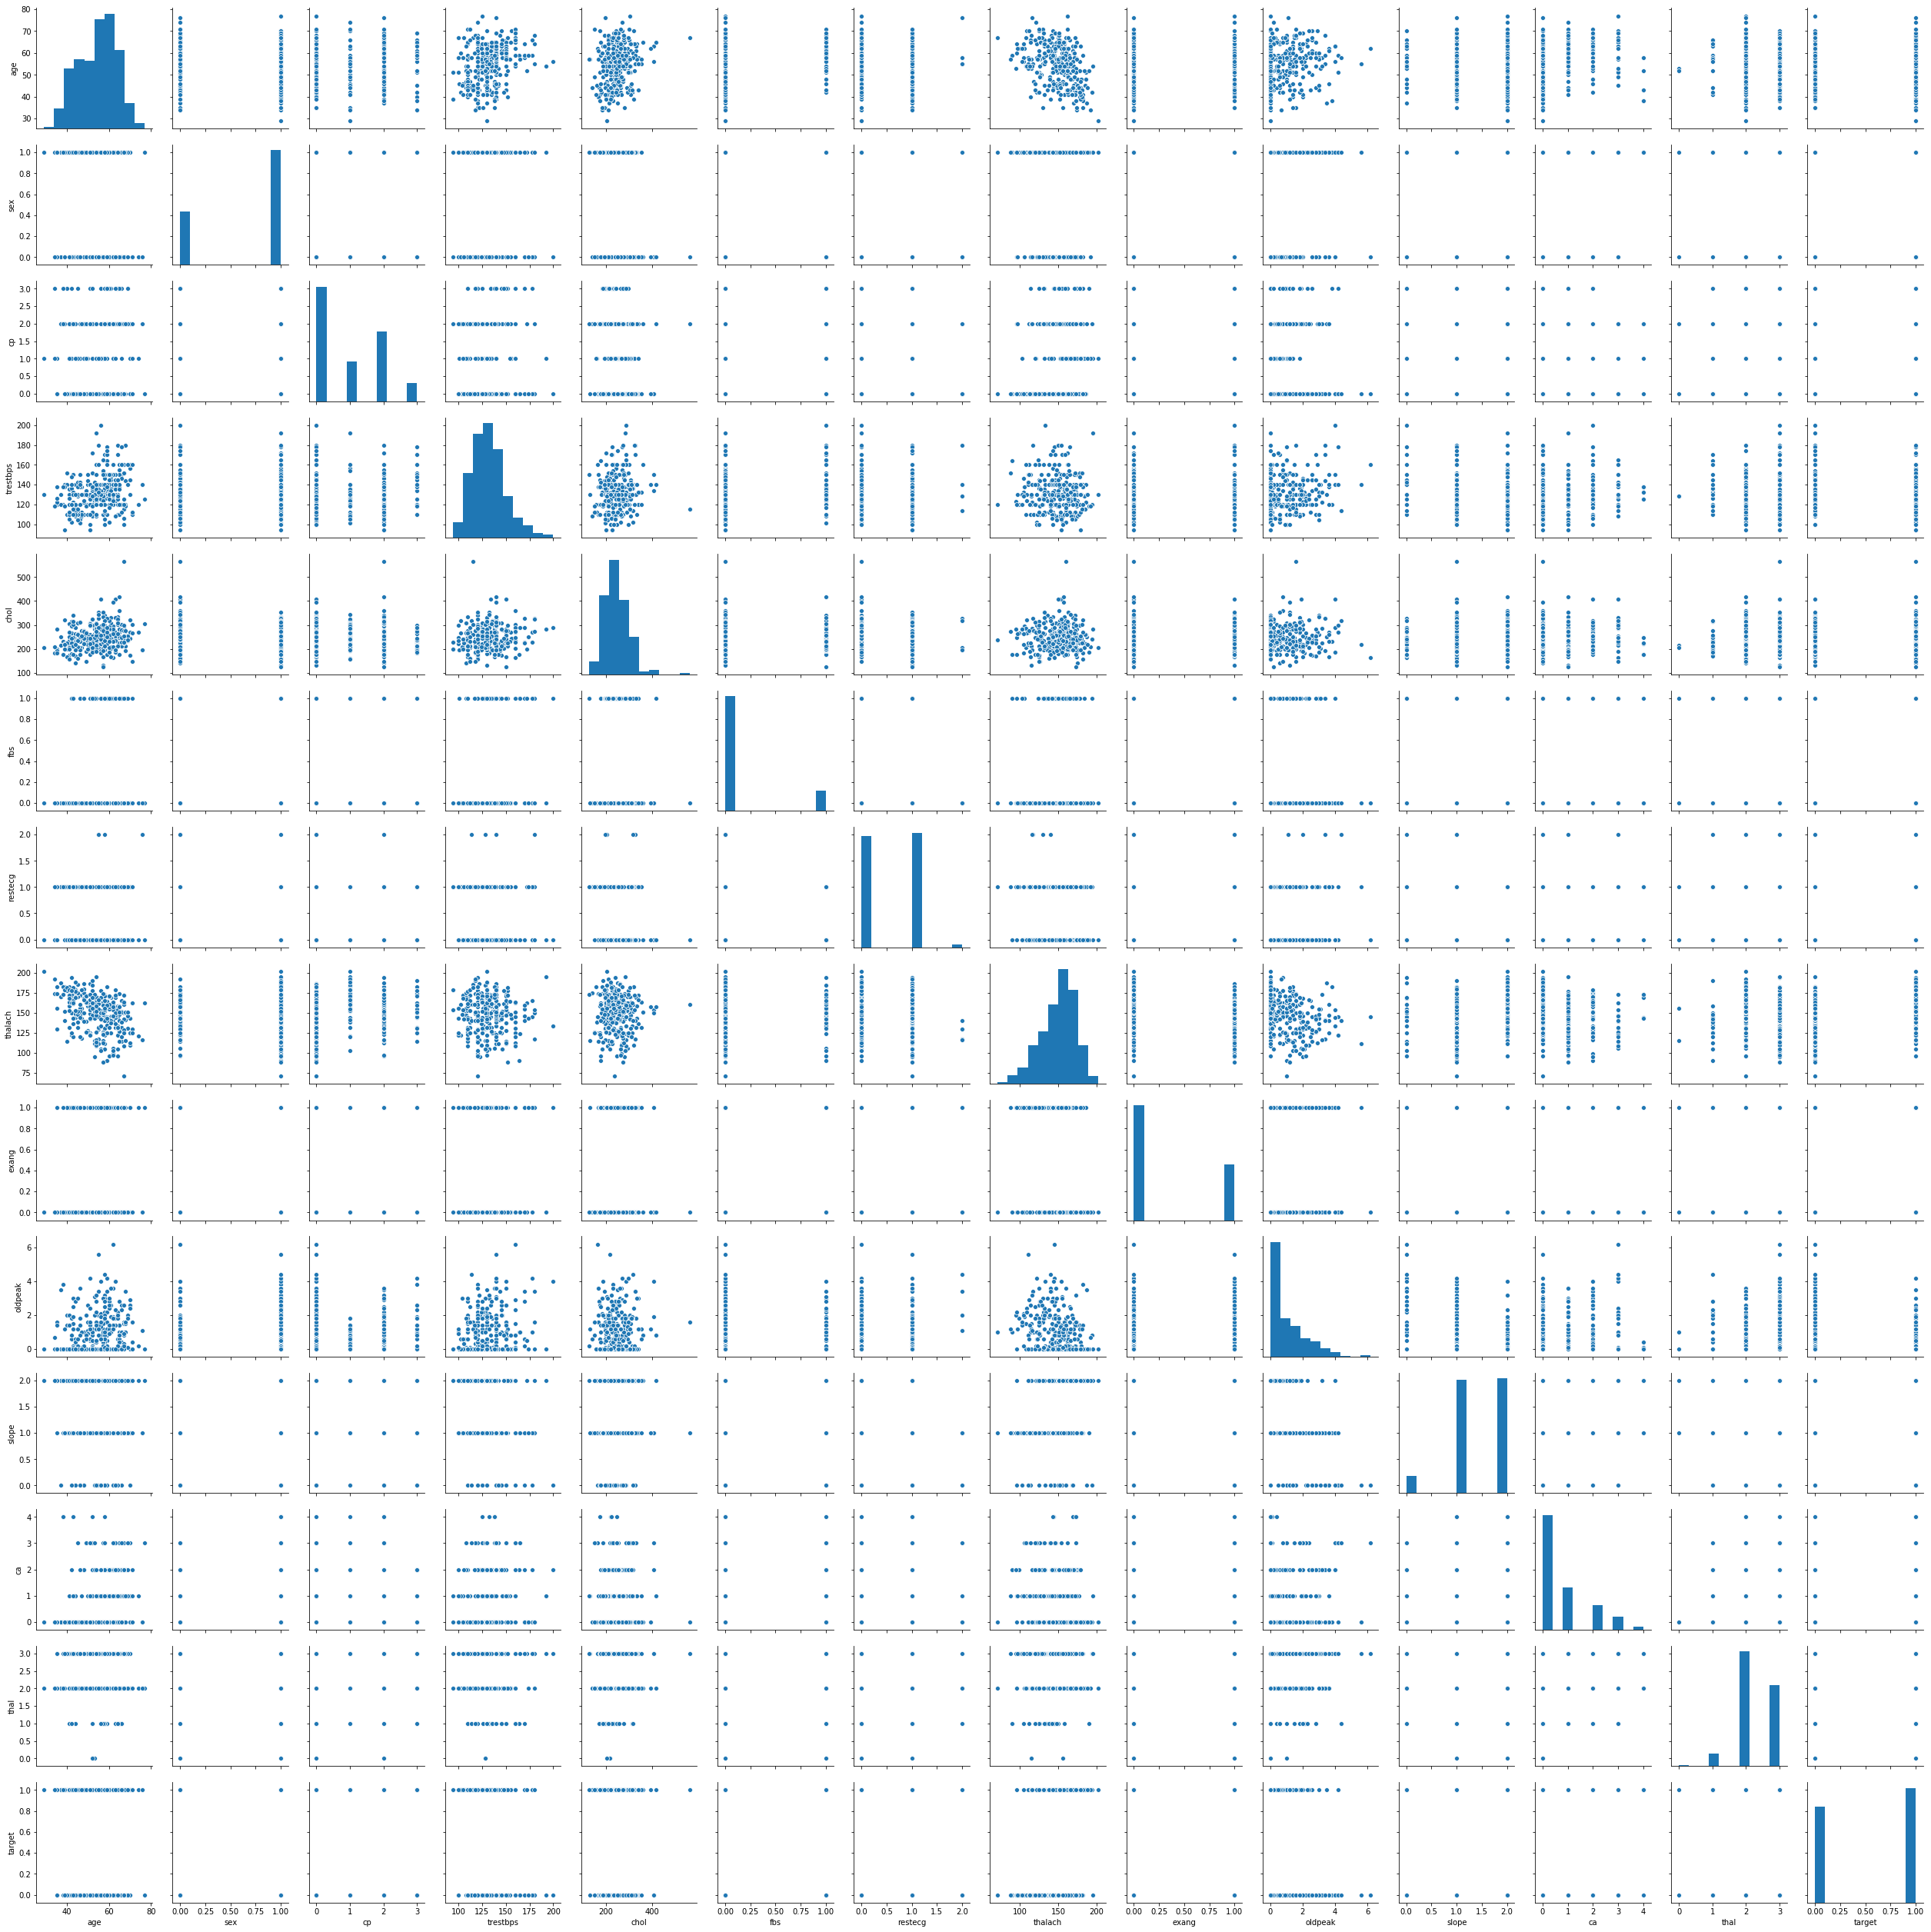

In [14]:
import seaborn as sns
sns.pairplot(data)
plt.show()

# Understanding Data With Descriptive Statistics

## Dimension of Data

In [15]:
data.shape

(303, 14)

## Data Type for each attribute

In [16]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Descriptive Statistics 
Descriptive statistics can give you great insight into the shape of each attribute. Often you can
create more summaries than you have time to review. The describe() function on the Pandas
DataFrame lists 8 statistical properties of each attribute. They are:
- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value

In [17]:
description = data.describe()
print(description)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Class Distribution 
On classification problems you need to know how balanced the class values are. Highly imbalanced
problems (a lot more observations for one class than another) are common and may need special
handling in the data preparation stage of the project.

In [18]:
class_counts = data.groupby(['target']).size()
print(class_counts)

target
0    138
1    165
dtype: int64


## Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not
change together. The most common method for calculating correlation is Pearson's Correlation
Coeficient, that assumes a normal distribution of the attributes involved. A correlation of -1
or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all. Some machine learning algorithms like linear and logistic regression can suffer
poor performance if there are highly correlated attributes in the dataset. As such, it is a good
idea to review all of the pairwise correlations of the attributes in the dataset. we can use the
corr() function on the Pandas DataFrame to calculate a correlation matrix. 

In [19]:
correlations = data.corr(method = 'pearson')
print(correlations)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

## Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame.

In [20]:
skew = data.skew()
print(skew)

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


# Understanding Data With Visulization

## Univariate Plots
- Histograms.
- Density Plots.
- Box and Whisker Plots. 

### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

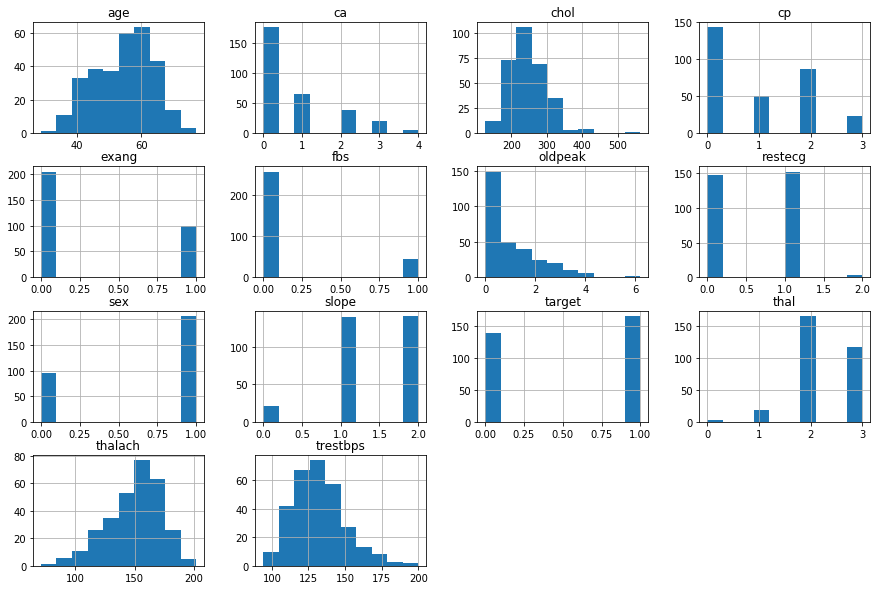

In [21]:
plt.rcParams['figure.figsize'] = [15,10]
data.hist()
plt.show()

# Multivariate Plots
- Correlation Matrix Plot.
- Scatter Plot Matrix.

## Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation
with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data. 

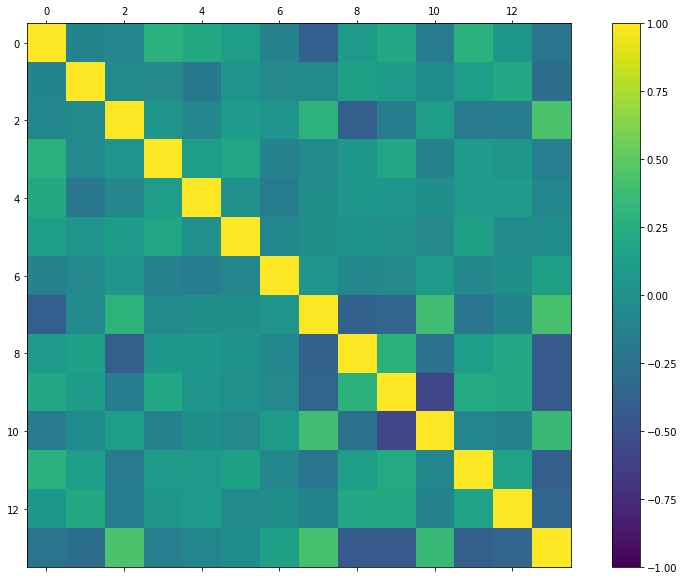

In [22]:
from matplotlib import pyplot
import numpy
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

# Preparing Data For Machine Learning

## Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors. 

In [23]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


In [24]:
X = data.iloc[::,:-1]
Y = data.iloc[::,-1]

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Feature Selection For Machine Learning 
Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three benefits of performing feature selection
before modeling your data are:
    - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    - Improves Accuracy: Less misleading data means modeling accuracy improves.
    - Reduces Training Time: Less data means that algorithms train faster.

In [26]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[ 23.287   7.577  62.598  14.824  23.936   0.203   2.978 188.32   38.914
  72.644   9.804  66.441   5.792]


In [27]:
keys = data.columns
values = fit.scores_
features = dict(zip(keys,values))
features = {k: v for k, v in sorted(features.items(), key=lambda item: item[1])}
features

{'fbs': 0.20293368467281492,
 'restecg': 2.978270750988143,
 'thal': 5.7918529711930535,
 'sex': 7.576834507647363,
 'slope': 9.804095197255574,
 'trestbps': 14.823924500200537,
 'age': 23.286623985733986,
 'chol': 23.936394475916686,
 'exang': 38.91437697129396,
 'cp': 62.59809791039943,
 'ca': 66.4407651172357,
 'oldpeak': 72.64425301461824,
 'thalach': 188.32047168970058}

In [28]:
extract = [key for key,value in features.items() if value > 10]
extract

['trestbps', 'age', 'chol', 'exang', 'cp', 'ca', 'oldpeak', 'thalach']

# Model Building

In [29]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Split-out validation dataset
X = data[extract]
Y = data['target']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.784500 (0.110421)
LDA: 0.784500 (0.102258)
KNN: 0.640167 (0.088545)
CART: 0.722833 (0.086107)
NB: 0.763833 (0.121193)
SVM: 0.545333 (0.069325)


In [32]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

ScaledLR: 78.033333 (0.102729)
ScaledLDA: 78.450000 (0.102258)
ScaledKNN: 78.900000 (0.077986)
ScaledCART: 75.183333 (0.087564)
ScaledNB: 76.383333 (0.121193)
ScaledSVM: 78.466667 (0.089610)


# Algorithm Tuning
In this section we investigate tuning the parameters for two algorithms that show promise from
the spot-checking in the previous section: KNN and SVM.

## Tuning KNN 

In [33]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean*100, stdev, param))

Best: 0.797521 using {'n_neighbors': 9}
73.966942 (0.087019) with: {'n_neighbors': 1}
75.619835 (0.080564) with: {'n_neighbors': 3}
78.925620 (0.077905) with: {'n_neighbors': 5}
78.512397 (0.084545) with: {'n_neighbors': 7}
79.752066 (0.077722) with: {'n_neighbors': 9}
78.512397 (0.087073) with: {'n_neighbors': 11}
77.272727 (0.099240) with: {'n_neighbors': 13}
78.099174 (0.086106) with: {'n_neighbors': 15}
77.685950 (0.094119) with: {'n_neighbors': 17}
76.859504 (0.086395) with: {'n_neighbors': 19}
77.272727 (0.080203) with: {'n_neighbors': 21}


## Tuning SVM 

In [34]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean*100, stdev, param))

Best: 0.809917 using {'C': 2.0, 'kernel': 'sigmoid'}
78.099174 (0.112312) with: {'C': 0.1, 'kernel': 'linear'}
71.487603 (0.091131) with: {'C': 0.1, 'kernel': 'poly'}
77.685950 (0.122846) with: {'C': 0.1, 'kernel': 'rbf'}
80.165289 (0.091573) with: {'C': 0.1, 'kernel': 'sigmoid'}
78.925620 (0.096325) with: {'C': 0.3, 'kernel': 'linear'}
76.446281 (0.075543) with: {'C': 0.3, 'kernel': 'poly'}
78.925620 (0.082666) with: {'C': 0.3, 'kernel': 'rbf'}
80.165289 (0.100227) with: {'C': 0.3, 'kernel': 'sigmoid'}
78.099174 (0.095366) with: {'C': 0.5, 'kernel': 'linear'}
76.446281 (0.073229) with: {'C': 0.5, 'kernel': 'poly'}
78.099174 (0.090016) with: {'C': 0.5, 'kernel': 'rbf'}
78.512397 (0.111522) with: {'C': 0.5, 'kernel': 'sigmoid'}
78.099174 (0.095366) with: {'C': 0.7, 'kernel': 'linear'}
76.859504 (0.068624) with: {'C': 0.7, 'kernel': 'poly'}
77.685950 (0.092272) with: {'C': 0.7, 'kernel': 'rbf'}
79.338843 (0.117705) with: {'C': 0.7, 'kernel': 'sigmoid'}
78.099174 (0.095366) with: {'C': 0.

## Ensembles 

In [35]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

AB: 74.433333 (0.071516)
GBM: 74.816667 (0.066393)
RF: 78.083333 (0.046111)
ET: 74.783333 (0.080243)


# Finalize Model
The SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [40]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2,kernel='sigmoid')
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6885245901639344
[[17 11]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        28
           1       0.69      0.76      0.72        33

   micro avg       0.69      0.69      0.69        61
   macro avg       0.69      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61

